In [34]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

import sklearn.preprocessing as preprocessing

%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500) # to see all columns

In [35]:
data = pd.read_csv('CrowdstormingDataJuly1st.csv')
data_total = data.copy()
print('Number of dayads', data.shape)
data.head()

Number of dayads (146028, 28)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# 1. Observation and clean of the data

In [36]:
print('Number of diad: ', len(data))
print('Number of players: ', len(data.playerShort.unique()))
print('Number of referees: ', len(data.refNum.unique()))

Number of diad:  146028
Number of players:  2053
Number of referees:  3147


## 1.1. Missing values

In [37]:
complete = len(data.dropna())
all_ = len(data_total)
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))


Number of row with complete data: 115457 (79.065%)
Number of row with missing data: 30571 (20.935%)


### Where are the missing values ?

In [38]:
def find_col_nan(d):
    col = []
    for c in d.columns:
        if d[c].isnull().any():
            col = np.append(col, c)
    return col        

In [39]:
missing_col = find_col_nan(data)
missing_col

array(['height', 'weight', 'position', 'photoID', 'rater1', 'rater2',
       'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

To clean the data, we will go step by step:
    - First of all we have to clean all dayads that don't have any rating, because those dayads are uneseful for our problem.
    - Then we will look again which columns contains missing values and how to deal with them

In [40]:
data = data[ ~data.rater1.isnull() & ~data.rater2.isnull()]
print('Number of row with the 2 ratings {} ({:.3f}%)'.format(len(data), len(data)/len(data_total) * 100))
onlyOne = data[ ~data.rater1.isnull() ^ ~data.rater2.isnull()]
print('Number of row with only one ratings {} ({:.3f}%)'.format(len(onlyOne), len(onlyOne)/len(data_total) * 100))


Number of row with the 2 ratings 124621 (85.340%)
Number of row with only one ratings 0 (0.000%)


Check now how many incomplete dayads our data contains now

In [41]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 115457 (92.647%)
Number of row with missing data: 9164 (7.353%)


Let's check again the columns with missing values

In [42]:
missing_col = find_col_nan(data)
missing_col

array(['height', 'weight', 'position', 'Alpha_3', 'meanIAT', 'nIAT',
       'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

We only 7.4% of incomplete dayads. Let's try to replace the nan in heights and weights with the median

In [43]:
# replace no height and weight with the mean value
median_height = np.median(data['height'].dropna())
median_weight = np.median(data['weight'].dropna())
data['height'] = data['height'].fillna(value=median_height)
data['weight'] = data['weight'].fillna(value=median_weight)

In [44]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 116014 (93.093%)
Number of row with missing data: 8607 (6.907%)


In [45]:
missing_col = find_col_nan(data)
missing_col

array(['position', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp',
       'nExp', 'seExp'], 
      dtype='<U32')

The incomplete row only represent 7%.
We will check if 2 dayads with referee of the same country, one with complete data and an other one with missing IAT and Exp info exist. In that case it is easy to complete those information

In [46]:
missing_col_test = ['meanIAT', 'nIAT', 'seIAT', 'meanExp',
       'nExp', 'seExp']
exist = False
def checkMissingTest(df):
    for col in missing_col_test:
        nbr_dayads = len(df)
        nbr_noNaN = len(df.dropna(subset=[col]))
        if nbr_dayads > nbr_noNaN &  nbr_noNaN > 0:
            exist = True
            print('There exist valid data for ', df.Alpha_3)
grouped = pd.groupby(data, by='refCountry').apply(checkMissingTest)      
print('Does it exist 2 dayads of same country, one with info on test and one with missing values in test ?: ', exist)

Does it exist 2 dayads of same country, one with info on test and one with missing values in test ?:  False


Look at how many player don't have a position

In [47]:
complete = len(data.dropna(subset=['position']))
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 116160 (93.211%)
Number of row with missing data: 8461 (6.789%)


For those player we will try to assign them a new position called 'Joker'

In [48]:
data.position = data.position.fillna('Joker')

In [49]:
missing_col = find_col_nan(data)
missing_col

array(['Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

In [50]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 124468 (99.877%)
Number of row with missing data: 153 (0.123%)


The remaining NaN represent only 0.1% and concern the columns about country and the test in those country which are hard to guess. So we deceide to drop the remaining dayad with NaN

In [51]:
data = data.dropna()
find_col_nan(data)


[]

## 1.2. Handling different ratings (rater1 vs rater2)
- We check if there is player with only one rating
- We also check if one rater always give the same rate to the same player
- Now we need to take one single rating for each row. We'll need to investigate a bit more the different rating



- what rating to take:
    - take the rating of the rater where less dissagreement happend. (rater2->0, rater1->1, rater2->2, rater2->3, rater1->4) so if rater2 rated 0 take it... (in order 4, 0, 1, 2, 3)
    - compare taking only rater1 vs rater2
    - make a colum 'color_rating' and remove the other two
    

Is there players with only one rating?

In [52]:
(data.rater1.isnull() | data.rater2.isnull()).any()

False

Are the raters consistent?

In [53]:
def areRaterConsistent(d):
    for playerID in d.playerShort.unique():
  
        player = d[d.playerShort == playerID]
        rater1 = player.rater1.unique()
        rater2 = player.rater2.unique()
        if len(rater1) >1 or len(rater2) > 1:
            return False
    return True  

In [54]:
print("Are the rater consistent: ",areRaterConsistent(data))

Are the rater consistent:  True


### Investigation on the raters

Values of the rating

In [55]:
data.rater1.unique()

array([ 0.25,  0.75,  0.  ,  1.  ,  0.5 ])

Are the raters always agree

In [56]:
print("percentage of players with different ratings: ", len(data[data['rater1'] != data['rater2']])*100 / len(data), "%")

percentage of players with different ratings:  23.18989619821962 %


Let's show some plost to visualize when the rater differe

In [57]:
len(data)

124468

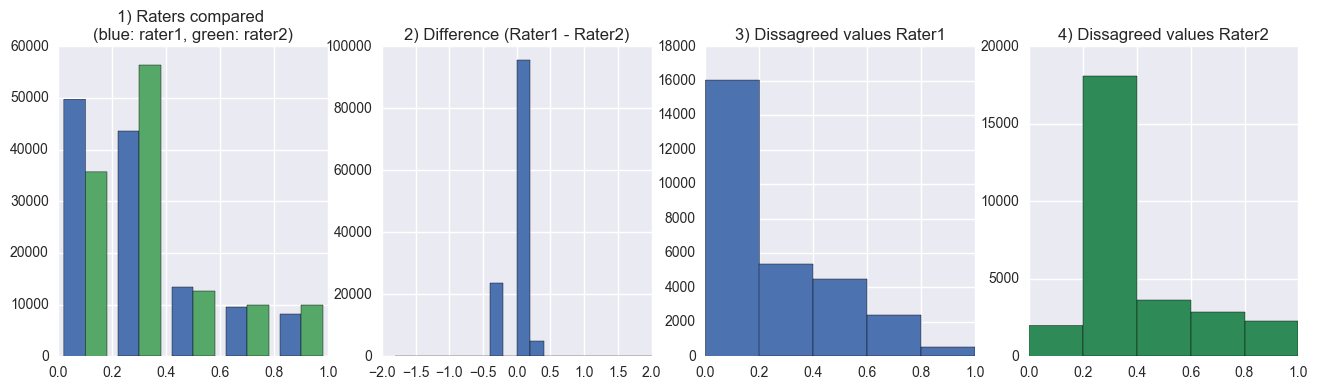

In [58]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].hist([data['rater1'], data['rater2']], bins=5)
ax[0].set_title("1) Raters compared \n(blue: rater1, green: rater2)")

ax[1].hist(data['rater1'] - data['rater2'], bins=20, range=(-2,2))
ax[1].set_title("2) Difference (Rater1 - Rater2)")

dissagree_data = data[data['rater1'] != data['rater2']]
ax[2].hist(dissagree_data['rater1'], bins=5)
ax[2].set_title("3) Dissagreed values Rater1")

ax[3].hist(dissagree_data['rater2'], bins=5, color='seagreen')
ax[3].set_title("4) Dissagreed values Rater2")

We can see that rater1 and 2 disagree the most when they have to rate "white" people.

We can also see with graph2 that when there disagree it's ony of one category.


Now we will create a new columns: color_skin that will be our label to guess. To convert the values of rater 1 and 2 in one rate, we need to follow some rules that come from the graph:
    1. if rater1 and rater2 are agree, take that value
    2. We can see on graph 4 that when rater2 give 0, usually, rater1 agrees => so when rater2 give 0, we take that value as the color skin
    3. In graph 3, when rater1 give 1, rater2 usually agrees => when rater1 give 1, take that value as the color_skin
    4. In graph 3, we can see that when rater1 rate1 give 0.25, usually rater2 agrees => take rater1
    5. choose at random between both values
    
    

In [59]:
data['color_rating'] = -1

In [60]:
def color_skin_rules(row):
    #Rule 1
    if row.rater1 == row.rater2:
        return row.rater1
    #Rule2    
    elif row.rater2 == 0:
        return 0
    #Rule 3
    elif row.rater1 == 1:
        return 1
    #Rule 4
    elif row.rater1 == 0.25:
        return 0.25
    else: 
        return np.random.choice([row.rater1, row.rater2])
data.color_rating = data.apply(color_skin_rules, axis=1)


# Transform the data

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

In [63]:
# encoders
le = pp.LabelEncoder() # for playernames etc.
ohe = pp.OneHotEncoder() # for categories with 'few' categories

In [64]:
rf_input_data = data.copy()

rf_input_data['player'] = le.fit_transform(data['player'])
rf_input_data['club'] = le.fit_transform(data['club'])
rf_input_data['leagueCountry'] = le.fit_transform(data['leagueCountry'])
rf_input_data['birthday'] = le.fit_transform(data['birthday'])
rf_input_data['position'] = le.fit_transform(data['position'])
rf_input_data['color_rating'] = le.fit_transform(data['color_rating'])
rf_input_data['Alpha_3'] = le.fit_transform(data['Alpha_3'])
rf_input_data['photoID'] = le.fit_transform(data['photoID'])
rf_input_data['playerShort'] = le.fit_transform(data['playerShort'])
rf_input_data.head(1)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,color_rating
0,901,1046,70,3,1382,177.0,72.0,0,1,0,0,1,0,0,0,0,1532,0.25,0.5,1,1,59,0.326391,712.0,0.000564,0.396,750.0,0.002696,1


In [66]:
rf_input_data.dtypes

playerShort        int64
player             int64
club               int64
leagueCountry      int64
birthday           int64
height           float64
weight           float64
position           int64
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID            int64
rater1           float64
rater2           float64
refNum             int64
refCountry         int64
Alpha_3            int64
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
color_rating       int64
dtype: object

In [67]:
rf_input_data.to_csv('CrowdstormingDataJuly1st_preprocessed.csv')